
# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**This analysis treat with TMDb movie dataset to answer about some questions based on adjusted currancy value that corrected for inflation or gross domestic product (GDP) to cover for period of movies release years that about 55 year from 1960 till 2015.**

### Questions is:

* **What's period that movies released duration?**
* **Which most popular movie weighted by voters and rating number?**
* **Movie with highest or lowest adjusted budget?**
* **Which movie made the highest and lowest adjusted revenue?**
* **Which movie Has the highest or lowest adjusted profit?**
* **Which movie has longest and shorest runtime?**
* **What's avearage runtime of movies?**
* **Which year has the highest count release of movies?**
* **Which year has the highest adjusted profit?**
* **Which genre has the most count of released movies?**
* **Which most star acted in movies?**
* **Which is production company with highest number of released movies?**
* **Which is director who directed maximum Movies?**

In [2]:
# Import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Display Data Frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Display total count of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#Check duplicated values
df.duplicated().sum()

1

### Data Cleaning :
* Remove duplicate data
* Convert columns data to suitable type and remove that not useful in our processing
* Remove null and zeros rows

In [6]:
# Remove duplicated Values and check after
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
#Convert 'release_date' column to datatime format and insure from some columns tepe then check after
df['release_date']=pd.to_datetime(df['release_date'])
df[['cast','genres','production_companies']] = df[['cast','genres','production_companies']].astype(str)
df[['budget_adj','revenue_adj']]=df[['budget_adj','revenue_adj']].applymap(np.int64)

df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

In [8]:
#Romve columns that not be useful in analysis
df.drop([ 'id', 'imdb_id', 'homepage', 'tagline','keywords', 'overview'],axis=1,inplace=True)

In [9]:
# Remove all null data in 'budget_adj','revenue_adj' columns and check null values after
df[['budget_adj','revenue_adj']]=df[['budget_adj','revenue_adj']].replace(0, np.NAN)
df.dropna(subset=['budget_adj','revenue_adj'],inplace=True)

# Display data frame shape after removing
df.shape

(3853, 15)

In [10]:
#Creating more columns for analysing
df['vote_popularity']=df['vote_count']*df['vote_average']*df['popularity']
df['Profit_adj']=df['revenue_adj']-df['budget_adj']

In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.192534e+06,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,1.248019e+06,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2.048698e+05,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,4.434605e+05,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,2.008251e+05,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : What's period that movies released duration?

In [11]:
#Display period of movies database
period=df['release_year'].max()-df['release_year'].min()
'Movies database cover period about {} years from {} to {}'.format(period,df['release_year'].min(),df['release_year'].max())

'Movies database cover period about 55 years from 1960 to 2015'

### Research Question 2 : Which most popular movie weighted by voters and rating number?

In [12]:
#Display most max. and min. vote popularity and popularity in movies
df[df['vote_popularity'] == df['vote_popularity'].max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,151980023.0,572690645.0,1.296956e+06,420710622.0


**Most popular movie weighted by voters and rating number is "Interstellar" in 2014**

### Research Question 3 : Which movie with highest or lowest adjusted budget?

In [13]:
#Display most max. and min. adjusted budget in movies
higher_budget_adj=df[df['budget_adj'] == df['budget_adj'].max()]
lower_budget_adj=df[df['budget_adj'] == df['budget_adj'].min()]
pd.concat([higher_budget_adj, lower_budget_adj], axis=0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,118.655744,-413912431.0
2618,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1.0,130.0,6.060499,129.0


**Movie with highest adjusted budget is "The Warrior's Way" in 2010 and lowest one is "Love, Wedding, Marriage" in 2011**

### Research Question 4 : Which movie made the highest and lowest adjusted revenue ?

In [14]:
#Display most max. and min. adjusted revenue in movies
higher_revenue_adj=df[df['revenue_adj'] == df['revenue_adj'].max()]
lower_revenue_adj=df[df['revenue_adj'] == df['revenue_adj'].min()]
pd.concat([higher_revenue_adj, lower_revenue_adj], axis=0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902.0,2.827124e+09,566454.697382,2.586237e+09
5067,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7112115.0,2.000000e+00,136.192090,-7.112113e+06
8142,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8585801.0,2.000000e+00,754.597979,-8.585799e+06


**Movie with highest adjusted revenue is "Avatar" in 2009 and lowest one is "Shattered Glass
" in 2003**

### Research Question 5 : Which movie Has the highest or lowest adjusted profit?

In [15]:
#Display most max. and min. adjusted Profit in movies
higher_profit_adj=df[df['Profit_adj'] == df['Profit_adj'].max()]
lower_profit_adj=df[df['Profit_adj'] == df['Profit_adj'].min()]
pd.concat([higher_profit_adj, lower_profit_adj], axis=0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,39575591.0,2.789712e+09,421101.341860,2.750137e+09
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,1.108757e+07,118.655744,-4.139124e+08


**Movie with highest adjusted profit is "Star Wars" in 1977 and lowest one is "The Warrior's Way" in 2010**

### Research Question 6 : Which movie has longest and shorest runtime?

In [16]:
#Display most max. and min. runtime of movies
longest_runtime=df[df['runtime'] == df['runtime'].max()]
shortest_runtime=df[df['runtime'] == df['runtime'].min()]
pd.concat([longest_runtime, shortest_runtime], axis=0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_popularity,Profit_adj
2107,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010,18000000.0,871279.0,115.919664,-17128721.0
5162,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,2003-06-02,16,6.8,2003,11.0,5.0,22.699706,-6.0


**Movie with longest runtime is "Carlos" in 2010 and lowest one is "Kid's Story" in 2003**

### Research Question 7 : What's avearage runtime of movies?

In [18]:
#Display runtime of movies statistics
df['runtime'].describe()

count    3853.000000
mean      109.225279
std        19.922999
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

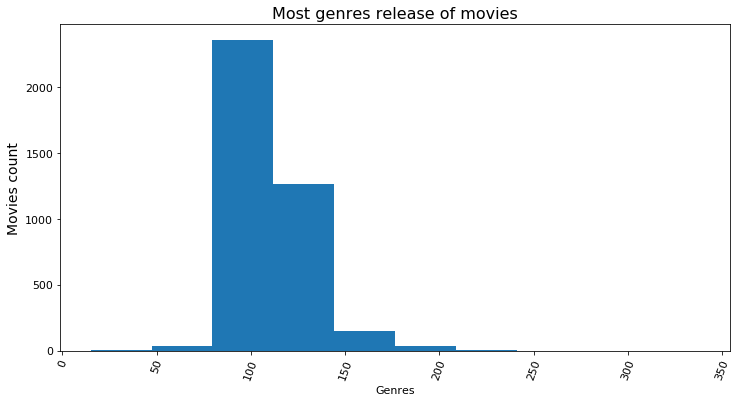

In [42]:

df['runtime'].plot(kind='hist',figsize=(12,6),fontsize=11)
plt.xlabel('Genres',fontsize=11)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Most genres release of movies',fontsize=16)
plt.show()

**Avearage runtime of movies is nearly 109 minutes**

### Research Question 8 : Which year has the highest count release of movies?

In [19]:
#Display Most count of movies yearly
movies_count=df['release_year'].value_counts()
movies_count

2011    198
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64

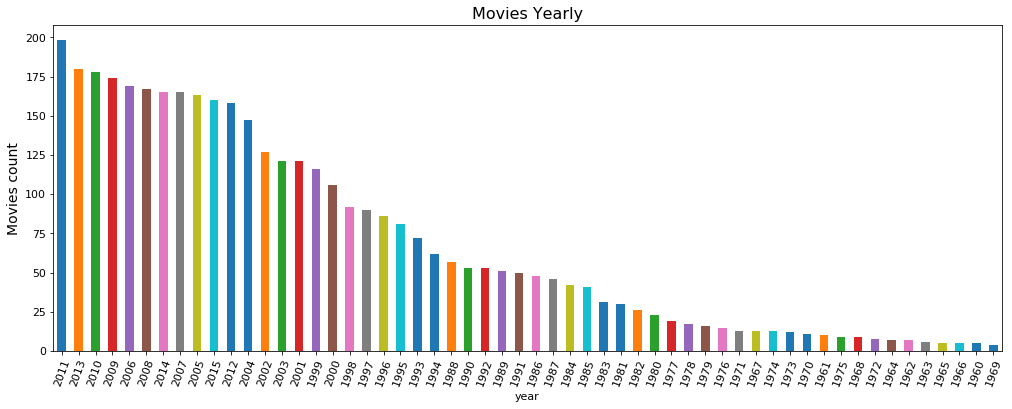

In [102]:
#Make chart as visual display for most count of movies yearly
movies_count.plot(kind='bar',figsize=(17,6),fontsize=11)
plt.xlabel('year',fontsize=11)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Movies Yearly',fontsize=16)
plt.show()

**The year has the highest count release of movies is 2011 with 198 movies in it**

### Research Question 9 : Which year has the highest adjusted profit?

In [20]:
#Display Most Adjusted profit of movies yearly
most_profit_year = df.groupby('release_year')['Profit_adj'].sum()
most_profit_year.sort_values(ascending=False)

release_year
2015    1.750957e+10
2012    1.576276e+10
2014    1.536030e+10
2013    1.477317e+10
2011    1.450868e+10
2009    1.430005e+10
2010    1.334122e+10
2007    1.228991e+10
2008    1.199481e+10
2004    1.133955e+10
2002    1.091592e+10
2003    1.090780e+10
2005    1.033877e+10
2001    9.879053e+09
2006    9.438970e+09
1997    8.667305e+09
1999    8.421411e+09
1995    8.025003e+09
2000    7.738026e+09
1998    7.055200e+09
1994    6.920674e+09
1993    6.907075e+09
1996    6.584938e+09
1989    6.339278e+09
1977    6.272042e+09
1992    6.018808e+09
1990    5.765886e+09
1973    5.194465e+09
1991    4.880325e+09
1988    4.265061e+09
1967    4.159569e+09
1987    4.123234e+09
1982    4.093921e+09
1984    3.848464e+09
1985    3.379081e+09
1978    3.359749e+09
1986    3.313068e+09
1983    3.295076e+09
1975    3.274711e+09
1981    3.166215e+09
1974    2.877058e+09
1979    2.855318e+09
1965    2.763256e+09
1980    2.651503e+09
1970    2.550225e+09
1976    2.411772e+09
1972    2.384285e+09


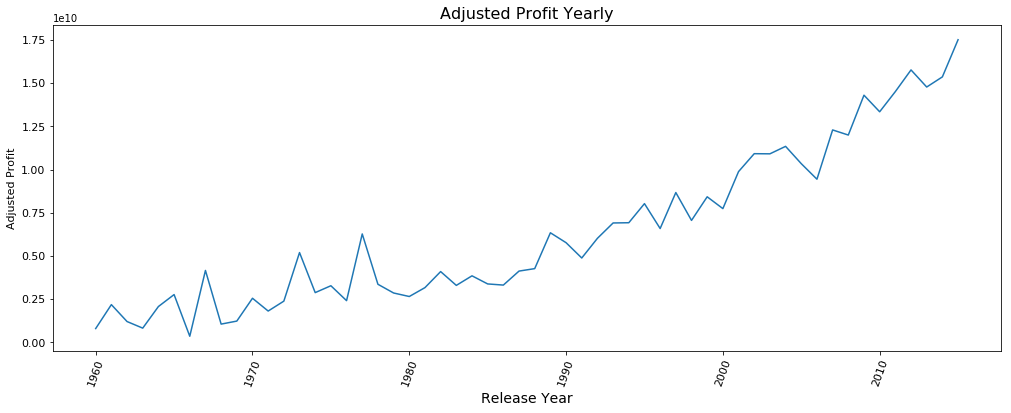

In [21]:
#Make chart as visual display for most adjusted profit movies yearly
most_profit_year.plot(kind='line',figsize=(17,6),fontsize=11)
plt.xlabel('Release Year',fontsize=14)
plt.xticks(rotation=70)
plt.ylabel('Adjusted Profit',fontsize=11)
plt.title('Adjusted Profit Yearly',fontsize=16)
plt.show()

**The year has the highest adjusted profit is 2015 with nearly 17.5 billion Dollar**

### Research Question 10 : Which genre has the most count of released movies?

In [22]:
#Display most genres release of movies
genres_count=pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts()
genres_count

Drama              1756
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

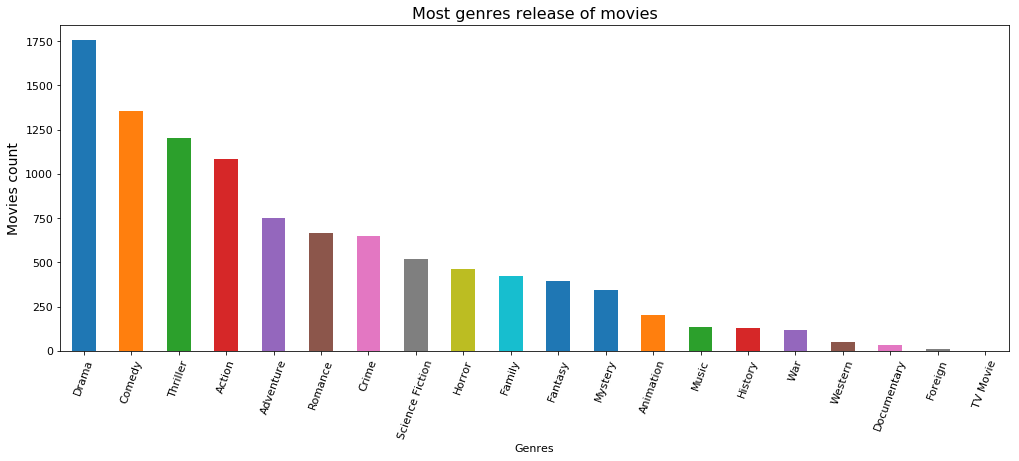

In [112]:
#Make chart as visual display for most genres count of movies
genres_count.plot(kind='bar',figsize=(17,6),fontsize=11)
plt.xlabel('Genres',fontsize=11)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Most genres release of movies',fontsize=16)
plt.show()

**The genre has the most count of released movies is "Drama" with 1755 movies**

### Research Question 11 : Which most star acted in movies?

In [23]:
#Display Most 20 actors played in movies
cast_count=pd.Series(df['cast'].str.cat(sep = '|').split('|')).value_counts().iloc[:20]
cast_count

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Sylvester Stallone    34
Tom Hanks             34
Brad Pitt             34
Tom Cruise            33
Eddie Murphy          32
Denzel Washington     32
Liam Neeson           31
Julianne Moore        30
Owen Wilson           30
Meryl Streep          29
Willem Dafoe          29
Mark Wahlberg         29
dtype: int64

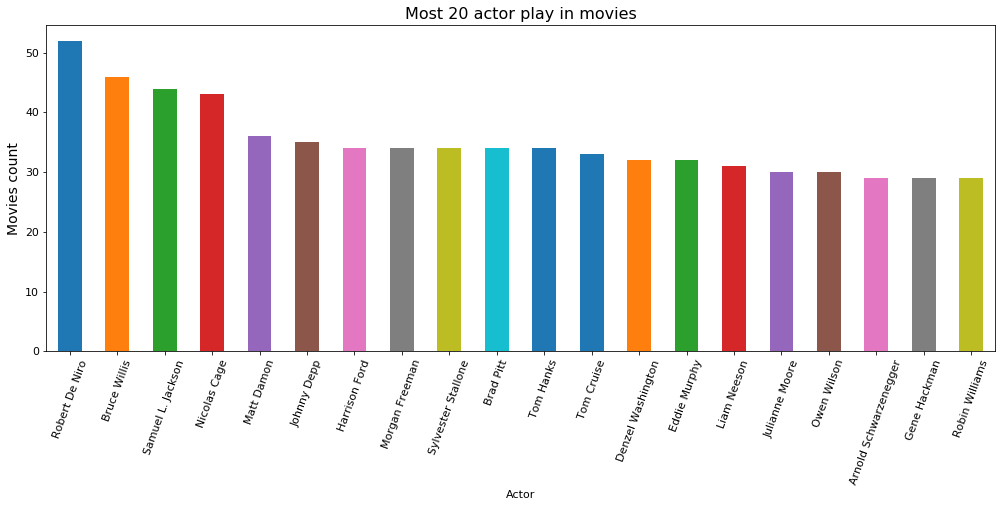

In [113]:
#Make chart as visual display for most 20 actor play in movies
cast_count.plot(kind='bar',figsize=(17,6),fontsize=11)
plt.xlabel('Actor',fontsize=11)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Most 20 actor play in movies',fontsize=16)
plt.show()

**Which most star acted in movies is "Robert De Niro" with 52 movies**

### Research Question 12 : Which is production company with highest number of released movies?

In [24]:
#Display Most 20 production companies
most_production_companies=pd.Series(df['production_companies'].str.cat(sep = '|').split('|')).value_counts().iloc[:20]
most_production_companies

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
Columbia Pictures Corporation             101
Miramax Films                              83
TriStar Pictures                           75
Village Roadshow Pictures                  74
DreamWorks SKG                             73
Regency Enterprises                        69
Dimension Films                            51
Summit Entertainment                       50
Amblin Entertainment                       50
Dune Entertainment                         49
dtype: int64

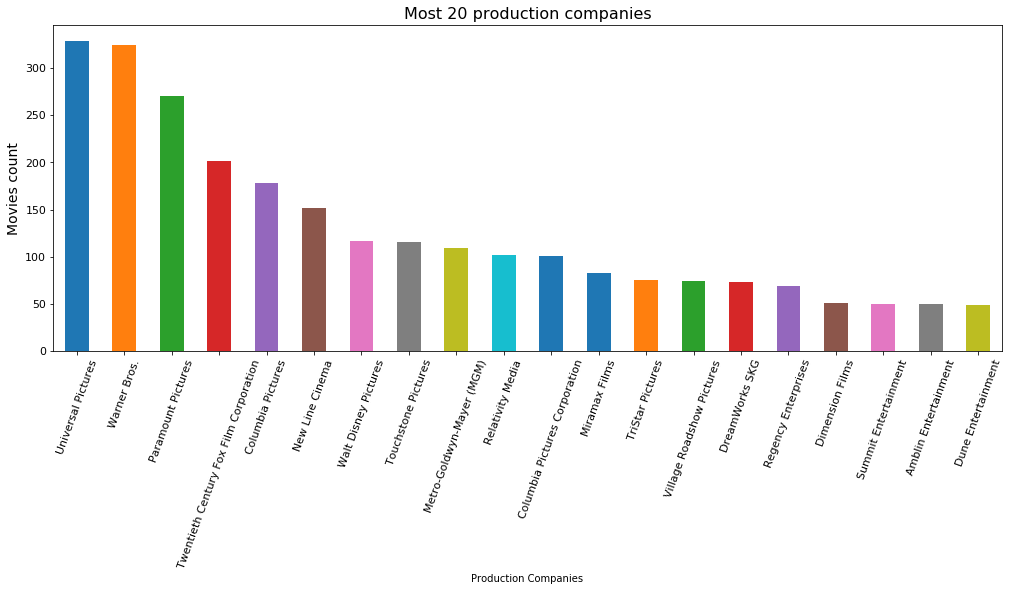

In [116]:
#Make chart as visual display for most 20 production companies
most_production_companies.plot(kind='bar',figsize=(17,6),fontsize=11)
plt.xlabel('Production Companies',fontsize=10)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Most 20 production companies',fontsize=16)
plt.show()

**The production company with highest number of released movies is "Universal Pictures" with 329 movies**

### Research Question 13 : Which is director who directed maximum Movies?

In [25]:
#Display Most 20 director directed movies
most_director=pd.Series(df['director'].str.cat(sep = '|').split('|')).value_counts().iloc[:20]
most_director

Steven Spielberg        28
Clint Eastwood          24
Ridley Scott            21
Woody Allen             18
Steven Soderbergh       17
Robert Rodriguez        17
Tim Burton              17
Martin Scorsese         17
Renny Harlin            15
Brian De Palma          15
Robert Zemeckis         15
Oliver Stone            15
Joel Schumacher         14
Ron Howard              14
Wes Craven              14
Tony Scott              14
Richard Donner          13
Francis Ford Coppola    13
Peter Farrelly          13
Walter Hill             12
dtype: int64

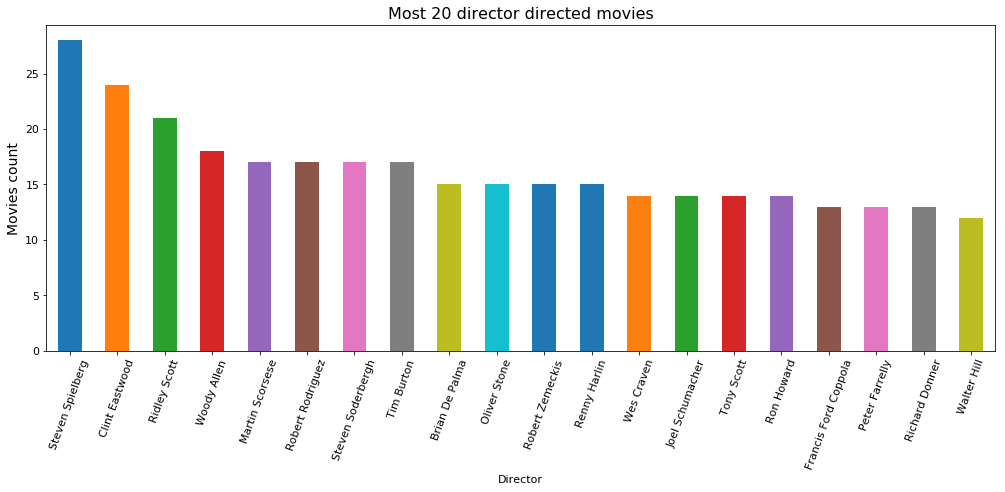

In [119]:
#Make chart as visual display for most 20 director directed movies
most_director.plot(kind='bar',figsize=(17,6),fontsize=11)
plt.xlabel('Director',fontsize=11)
plt.xticks(rotation=70)
plt.ylabel('Movies count',fontsize=14)
plt.title('Most 20 director directed movies',fontsize=16)
plt.show()

**The director who directed maximum Movies is "Steven Spielberg" with 28 movies**

<a id='conclusions'></a>
## Conclusions

**After analysis for TMDb database movie we reached for all answer we aim to :**

* **Movies of t s database cover 55 years from 1960 to 2015.**
* **Most popular movie weighted by voters and rating number is "Interstellar" in 2014.**
* **Movie with highest adjusted budget is "The Warrior's Way" in 2010 and lowest one is "Love, Wedding, Marriage" in 2011**.
* **Movie with highest adjusted revenue is "Avatar" in 2009 and lowest one is "Shattered Glass" in 2003.**
* **Movie with highest adjusted profit is "Star Wars" in 1977 and lowest one is "The Warrior's Way" in 2010.**
* **Movie with longest runtime is "Carlos" in 2010 and lowest one is "Kid's Story" in 2003.**
* **Avearage runtime of movies is nearly 109 minutes.**
* **The year has the highest count release of movies is 2011 with 198 movies in it.**
* **The year has the highest adjusted profit is 2015 with nearly 17.5 billion Dollar.**
* **The genre has the most count of released movies is "Drama" with 1755 movies.**
* **Most star acted in movies is "Robert De Niro" with 52 movies.**
* **The production company with highest number of released movies is "Universal Pictures" with 329 movies.**
* **The director who directed maximum Movies is "Steven Spielberg" with 28 movies.**

### Limitation
**limitation in this database from suitable data to analyise that about 35.5% (3853 data rows) only from genuine data with null cells (about 10866 rows), that make our analysis is not free from errors completely.**

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0